# Automated Graph of Thoughts - Demo

In [1]:
from auto_graph_of_thoughts.env import GraphStepRewardVersion
import logging

MAX_DEPTH = 8
MAX_BREADTH = 8
DIVERGENCE_CUTOFF_FACTOR = 0.5
MAX_COMPLEXITY = 64
MAX_OPERATIONS = 32

SEED = 42

REWARD_VERSION = GraphStepRewardVersion.V5
MAX_STEPS = 20

logging.basicConfig(level=logging.INFO)

## OpenAI API Setup

In [2]:
import getpass
import os

api_key = os.environ.get('OPENAI_API_KEY')
api_key = getpass.getpass('OPENAI_API_KEY') if api_key is None or api_key == '' else api_key
os.environ['OPENAI_API_KEY'] = api_key

In [3]:
from pure_graph_of_thoughts.language_model import ChatGPT

chat_gpt = ChatGPT(api_key=api_key)

## Controller Definition

In [4]:
from auto_graph_of_thoughts.experiment import generate_init_state
from random import Random

rnd = Random(SEED)
complexity = 60
_, init_state = generate_init_state(rnd, [complexity])

In [5]:
from auto_graph_of_thoughts.controller import ContinuousGraphController

controller = ContinuousGraphController(
        language_model=chat_gpt,
        generate_init_state=lambda: (complexity, init_state),
        max_depth=MAX_DEPTH,
        max_breadth=MAX_BREADTH,
        divergence_cutoff_factor=DIVERGENCE_CUTOFF_FACTOR,
        max_complexity=MAX_COMPLEXITY,
        max_operations=MAX_OPERATIONS
)

## Environment Definition

In [6]:
from auto_graph_of_thoughts.env import GraphOfThoughtsEnv
from auto_graph_of_thoughts.tasks.sum_list import sum_list_task

env = GraphOfThoughtsEnv(
        sum_list_task,
        controller,
        seed=SEED,
        reward_version=REWARD_VERSION,
        max_steps=MAX_STEPS
)

## Load Model

In [7]:
model_name = 'ppo_r5_pi32x32_vf32x32_c1to32_t2xx20_lrfix'

In [8]:
from stable_baselines3 import PPO
model = PPO.load(f'./artifacts/models/{model_name}')

## Run Demo

In [9]:
terminated = False
truncated = False
obs, info = env.reset(seed=SEED)
while not terminated and not truncated:
    action, _states = model.predict(obs)
    decoded_action = env.decode_action(action)
    obs, rewards, terminated, truncated, info = env.step(action)
    local_complexity = env.local_complexity
    print(f'local complexity: {local_complexity} action: {decoded_action.type.name}-{decoded_action.operation.name if decoded_action.operation is not None else None} = {float(rewards)}')

INFO:ContinuousGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:ChatGPT:state: {'list': [0, 4, 3, 3, 2, 1, 8, 1, 9, 6, 0, 0, 1, 3, 3, 8, 9, 0, 8, 3, 8, 6, 3, 7, 9, 4, 0, 2, 6, 5, 4, 2, 3, 5, 1, 1, 6, 1, 5, 5, 9, 4, 0, 7, 8, 1, 6, 1, 8, 4, 9, 5, 9, 3, 1, 0, 3, 4, 1, 3]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"lists": [[0, 4, 3, 3, 2, 1, 8, 1, 9, 6, 0, 0, 1, 3, 3, 8, 9, 0, 8, 3, 8, 6, 3, 7, 9, 4, 0, 2], [6, 5, 4, 2, 3, 5, 1, 1, 6, 1, 5, 5, 9, 4, 0, 7, 8, 1, 6, 1, 8, 4, 9, 5, 9, 3, 1, 0, 3, 4, 1, 3]]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:ChatGPT:state: {'list': [0, 4, 3, 3, 2, 1, 8, 1, 9, 6, 0, 0, 1, 3, 3, 8, 9, 0, 8, 3, 8, 6, 3, 7, 9, 4, 0, 

local complexity: 30 action: APPEND_OPERATION-split = 0.0875


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"lists": [[0, 4, 3, 3, 2, 1, 8, 1, 9, 6], [0, 0, 1, 3, 3, 8, 9, 0, 8, 3, 8, 6, 3, 7, 9, 4, 0, 2]]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:ChatGPT:state: {'list': [6, 5, 4, 2, 3, 5, 1, 1, 6, 1, 5, 5, 9, 4, 0, 7, 8, 1, 6, 1, 8, 4, 9, 5, 9, 3, 1, 0, 3, 4, 1, 3]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"lists": [[6, 5, 4, 2, 3, 5, 1, 1, 6, 1, 5, 5], [9, 4, 0, 7, 8, 1, 6, 1, 8, 4, 9, 5, 9, 3, 1, 0, 3, 4, 1, 3]]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:ChatGPT:state: {'list': [9, 4, 0, 7, 8, 1, 6, 1, 8, 4, 9, 5,

local complexity: 15 action: APPEND_OPERATION-split = 0.075


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"lists": [[9, 4, 0, 7, 8, 1, 6, 1, 8, 4], [9, 5, 9, 3, 1, 0, 3, 4, 1, 3]]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:ChatGPT:state: {'list': [6, 5, 4, 2, 3, 5, 1, 1, 6, 1, 5, 5]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: 
{"lists": [[6, 5, 4, 2, 3, 5], [1, 1, 6, 1, 5, 5]]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:ChatGPT:state: {'list': [0, 0, 1, 3, 3, 8, 9, 0, 8, 3, 8, 6, 3, 7, 9, 4, 0, 2]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"lists":

local complexity: 8 action: APPEND_OPERATION-split = 0.0625
local complexity: 8 action: APPEND_OPERATION-split = -0.1
local complexity: 8 action: APPEND_OPERATION-split = -0.1


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"sum": 24}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='sum', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=1)
INFO:ChatGPT:state: {'list': [8, 3, 8, 6, 3, 7, 9, 4, 0, 2]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: 
{
    "sum": 50
}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='sum', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=1)
INFO:ChatGPT:state: {'list': [6, 5, 4, 2, 3, 5]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"sum": 25}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='sum', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=1

local complexity: 1 action: APPEND_OPERATION-sum = 0.05


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"list": [12, 48]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='merge', n_inputs=2, n_outputs=1, type=<OperationType.AGGREGATE: 'aggregate'>, output_complexity=Fraction(2, 1))
INFO:ChatGPT:state: {'lists': [[19], [25]]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: 
{"list": [19, 25]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='merge', n_inputs=2, n_outputs=1, type=<OperationType.AGGREGATE: 'aggregate'>, output_complexity=Fraction(2, 1))
INFO:ChatGPT:state: {'lists': [[24], [50]]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"list": [24, 50]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='merge', n_inputs=2, n_outputs=1, type=<OperationType.AGGREGATE: 'a

local complexity: 2 action: APPEND_OPERATION-merge = 0.0375


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"list": [12, 48, 19, 25]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='merge', n_inputs=2, n_outputs=1, type=<OperationType.AGGREGATE: 'aggregate'>, output_complexity=Fraction(2, 1))
INFO:ChatGPT:state: {'lists': [[24, 50], [25, 38]]}
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: {"list": [24, 50, 25, 38]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='merge', n_inputs=2, n_outputs=1, type=<OperationType.AGGREGATE: 'aggregate'>, output_complexity=Fraction(2, 1))
INFO:ChatGPT:state: {'lists': [[12, 48, 19, 25], [24, 50, 25, 38]]}


local complexity: 4 action: APPEND_OPERATION-merge = 0.025


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: 
{"list": [12, 48, 19, 25, 24, 50, 25, 38]}
INFO:ContinuousGraphController:Processing operation PromptOperation(name='sum', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=1)
INFO:ChatGPT:state: {'list': [12, 48, 19, 25, 24, 50, 25, 38]}


local complexity: 8 action: APPEND_OPERATION-merge = 0.0125


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:ChatGPT:Response: 
{"sum": 241}


local complexity: 1 action: APPEND_OPERATION-sum = 0.0
local complexity: 1 action: STOP-None = 1.0


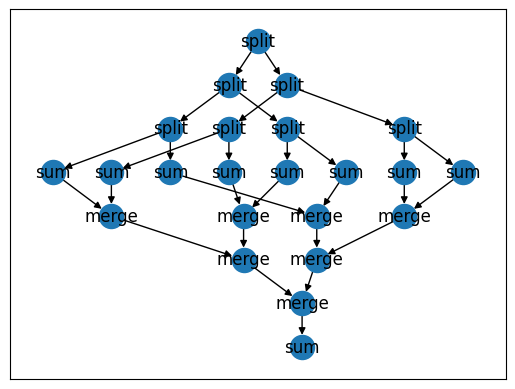

In [10]:
from pure_graph_of_thoughts.visualization import plot_graph

plot_graph(controller.graph_of_operations)

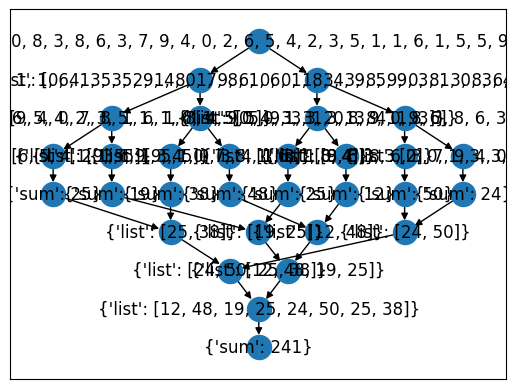

In [11]:
plot_graph(controller.graph_of_thoughts)

In [12]:
sum(init_state['list'])

241